In [2]:
import matplotlib.pyplot as plt
import statistics
import math

arquivo = open("ArquivoDadosProjeto.csv", "r")      #Abrindo o arquivo
dados = []                                          #Criando uma lista

for linha in arquivo:                               #Percorrendo o arquivo
  if 'data' in linha:                               #Garantindo que não vai pegar a primeira linha do arquivo com o cabeçalho
    pass
  else:
    valores = linha.split(';')                      #Separando as string pelo ';'
    ultima = valores[7][:-1]                        #Removendo o '\n' da ultima string 
    tupla = (valores[0], float(valores[1]),
             float(valores[2]), float(valores[3]),
             float(valores[4]), float(valores[5]), 
            float(valores[6]), float(ultima))       #Adicionando os valores em uma tupla
    dados.append(tupla)                             #Adicionando as tuplas em uma lista

In [3]:
# a) Qual é o mês mais chuvoso em todo esse período? Isto é, o mês/ano com maior volume acumulado de chuva,
# considerando todos os dados do arquivo? Utilize obrigatoriamente um dicionário.

maior_precipitacao, soma, i = 0,0,0
cont = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']   # Criando uma lista para verificar os meses

for data in dados:                                                                # Percorrendo os dados do arquivo
  if cont[i] != data[0][3:5]:                                                     # Verifica se o cont é difetente do mês 
    if soma >= maior_precipitacao:                                                             # Verifica se a variável 'soma' é maior que a variável 'maior_precipitacao'
      maior_precipitacao = soma                                                                # Atribui esse valor na variável 'maior_precipitacao'
      maior_mes = cont[i]                                                         # Armazena o mês em que o cont está
      if cont[i] == '12':                                                         # Verifica se o mês é igual a 12
        maior_ano = int(data[0][6:]) - 1                                          # Caso seja, vai fazer um -1 no ano, pois a data ja vai estar em janeiro do ano seguinte
      else:                                                                   
        maior_ano = data[0][6:]                                                   # Caso contrário é só armazenar o valor do ano
    soma = 0                                                                      # Atribui o 0 na soma, para poder verificar o próximo mês
    if i == 11:                                                                   # Se 'i' for igual a 11 significa que está em dezembro, então tem que recomeçar a contagem
      i = 0
    else:
      i = i + 1                                                                   # Caso não esteja em dezembro é só incrementar o 'i'

  if cont[i] == data[0][3:5]:                                                     # Verificar se o 'cont' é igual ao mês
    soma = soma + data[1]                                                         # Caso seja, soma a precipitação dos dias

dic = {}
dic["data"] = f"{maior_mes}/{maior_ano}"                                          # O 'data' do dicionário vai receber a data com a maior precipitação
dic["precipitaçao"] = f"{maior_precipitacao:.2f}"                                              # O 'precipitação' do dicionário vai receber a quantidade de precipitação no mês
print(f'Data: {dic["data"]} com {dic["precipitaçao"]} de precipitação')           # Print da resposta com o dicionário

Data: 06/1984 com 340.10 de precipitação


In [8]:
# b) Qual a média e a moda da temperatura mínima, umidade do ar e velocidade do vento no mês
#  de agosto (auge do inverno) nos últimos 10 anos (2006 a 2016)? Escreva as informações pedidas
#  para cada mês de agosto (agosto/2006, agosto/2007, ...agosto/2016) e, de forma geral, que engloba
#  todos os meses de agosto desse período de 10 anos.

anos = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']  # Lista para verificar os anos
temperatura_total = []
umidade_total = []
velocidade_vento_total = []
media_temperatura_mensal = []
media_umidade_mensal = []
media_velocidade_vento_mensal = []

def calculos_mensais(data):                                                                       # Função para calcular as médias e modas de agosto de cada ano
  media_temperatura_mensal.append(data[3])                                                        # Adiciona a temperatura mínima na lista
  media_umidade_mensal.append(data[6])                                                            # Adiciona a umidade na lista
  media_velocidade_vento_mensal.append(data[7])                                                   # Adiciona a velocidade do vento na lista

  if data[0][:2] == '31':                                                                         # Verifica quando está no último dia de agosto
    temp_mensal = sum(media_temperatura_mensal) / 31                                              # Soma todas as temperaturas do mês e divide pela quantidade de dias
    print(f'{data[0][3:]}:')                                                                      
    print(f'Média temperatura mínima: {temp_mensal:.2f}')                                             
    print(f'Moda da temperatura mínima: {statistics.mode(media_temperatura_mensal):.2f}')         # Usa a biblioteca statistics para calcular a moda da lista
    media_temperatura_mensal.clear()                                                              # Limpa a lista para armazenar os valores do próximo ano

    umidade_mensal = sum(media_umidade_mensal) / 31                                               # Soma todas os valores de umidade e divide pelos dias de agosto
    print(f'Média umidade do ar: {umidade_mensal:.2f}') 
    print(f'Moda da umidade do ar: {statistics.mode(media_umidade_mensal):.2f}')                  # Usa a biblioteca statistics para calcular a moda da lista
    media_umidade_mensal.clear()                                                                  # Limpa a lista para armazenar os valores do próximo ano

    velocidade_mensal = sum(media_velocidade_vento_mensal) / 31                                   # Soma todas os valores da velocidade do vento e divide pelos dias de agosto
    print(f'Média velocidade do vento: {velocidade_mensal:.2f}')
    print(f'Moda da velocidade do vento: {statistics.mode(media_velocidade_vento_mensal):.2f}')   # Usa a biblioteca statistics para calcular a moda da lista
    media_velocidade_vento_mensal.clear()                                                         # Limpa a lista para armazenar os valores do próximo ano
    print('\n')
    


def calculos_totais(data):                                                                        # Função para calcular a média e moda dos 10 anos 
  temperatura_total.append(data[3])                                                               # Adiciona a temperatura mínima na lista
  umidade_total.append(data[6])                                                                   # Adiciona a umidade na lista
  velocidade_vento_total.append(data[7])                                                          # Adiciona a velocidade do vento na lista

  if data[0] == '31/08/2015':                                                                     # Verifica se está no último dia de agosto do último ano (ja que 2016 nao tem o mês de agosto)
    print('-' * 50)                                                                         
    print('Nos ultimos 10 anos:')                       
    temperatura_minima_media = sum(temperatura_total) / 310                                       # Soma todas as temperaturas e divide por 31 dias * 10 anos
    print(f'Média da temperatura mínima: {temperatura_minima_media:.2f}')               
    print(f'Moda da temperatura mínima: {statistics.mode(temperatura_total):.2f}')                # Usa a biblioteca statistics para calcular a moda da lista

    umidade_ar_media = sum(umidade_total) / 310                                                   # Soma todas as umidades e divide por 31 dias * 10 anos
    print(f'Média da umidade do ar: {umidade_ar_media:.2f}')
    print(f'Moda da umidade do ar: {statistics.mode(umidade_total):.2f}')                         # Usa a biblioteca statistics para calcular a moda da lista

    velocidade_vento_media = sum(velocidade_vento_total) / 310                                    # Soma todas as velocidades e divide por 31 dias * 10 anos
    print(f'Média da velocidade do vento: {velocidade_vento_media:.2f}')
    print(f'Moda da velocidade do vento: {statistics.mode(velocidade_vento_total):.2f}')          # Usa a biblioteca statistics para calcular a moda da lista

for data in dados:                                                                                # Percorre todos os dados
  if data[0][6:] in anos:                                                                         # Verifica se está nos 10 últimos anos
    if data[0][3:5] == '08':                                                                      # Verifica se está em agosto
      calculos_mensais(data)                                                                      # Chama a função
      calculos_totais(data)                                                                       # Chama a função
      

08/2006:
Média temperatura mínima: 11.01
Moda da temperatura mínima: 14.40
Média umidade do ar: 77.58
Moda da umidade do ar: 80.00
Média velocidade do vento: 1.47
Moda da velocidade do vento: 0.47


08/2007:
Média temperatura mínima: 10.29
Moda da temperatura mínima: 12.60
Média umidade do ar: 82.13
Moda da umidade do ar: 90.00
Média velocidade do vento: 1.95
Moda da velocidade do vento: 1.53


08/2008:
Média temperatura mínima: 11.44
Moda da temperatura mínima: 13.20
Média umidade do ar: 80.23
Moda da umidade do ar: 78.00
Média velocidade do vento: 1.48
Moda da velocidade do vento: 2.00


08/2009:
Média temperatura mínima: 11.83
Moda da temperatura mínima: 12.80
Média umidade do ar: 76.81
Moda da umidade do ar: 87.50
Média velocidade do vento: 1.89
Moda da velocidade do vento: 1.33


08/2010:
Média temperatura mínima: 10.95
Moda da temperatura mínima: 9.40
Média umidade do ar: 80.70
Moda da umidade do ar: 79.25
Média velocidade do vento: 1.49
Moda da velocidade do vento: 1.27


08/201

In [10]:
# c) Qual é a década mais chuvosa, isto é, a que possui maior média de chuva acumulada por ano?
#  Para calcular isso, divida o volume de chuva da década pela quantidade de anos (lembre-se que a
#  última década só tem 6 anos - 2011 a 2016). Para realizar esse processamento, use as estruturas
#  de dados que você julgar necessário, tanto em tipo quanto em quantidade.
#   Década 1: 1961 - 1970
#   Década 2: 1971 - 1980
#   Década 3: 1981 – 1990
#   ...
quant_chuva_d1, quant_chuva_d2, quant_chuva_d3, quant_chuva_d4, quant_chuva_d5, quant_chuva_d6 = 0,0,0,0,0,0  # Variáveis para armazenar as quantidades de chuva

decada1 = ['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970']   # Criando listas para cada década
decada2 = ['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980']
decada3 = ['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']
decada4 = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000']
decada5 = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
decada6 = ['2011', '2012', '2013', '2014', '2015', '2016']

for data in dados:                                                                            # Percorrendo os dados
  if data[0][6:] in decada1:                                                                  # Verifica se o ano da linha está na década 1
    quant_chuva_d1 += data[1]                                                                 # Soma a precipitação
  elif data[0][6:] in decada2:                                                                # ... 
    quant_chuva_d2 += data[1]                                                                 # ... 
  elif data[0][6:] in decada3:                                                                # ... 
    quant_chuva_d3 += data[1]                                                                 # ... 
  elif data[0][6:] in decada4:                                                                # ... 
    quant_chuva_d4 += data[1]                                                                 # ... 
  elif data[0][6:] in decada5:                                                                # ... 
    quant_chuva_d5 += data[1]                                                                 # ... 
  else:                                                                                       # ... 
    quant_chuva_d6 += data[1]                                                                 # ... 

media_d1 = quant_chuva_d1 / 10                                                                # Calcula a média de cada década
media_d2 = quant_chuva_d2 / 10                                                                # ...
media_d3 = quant_chuva_d3 / 10                                                                # ...
media_d4 = quant_chuva_d4 / 10                                                                # ...
media_d5 = quant_chuva_d5 / 10                                                                # ...
media_d6 = quant_chuva_d6 / 6                                                                 # ...

maior = media_d1        
decada = 'Década 1'
if media_d2 >= maior:                                                                         # Verifica qual média é a maior, e atribui ela na variável 'maior'
  maior = media_d2                                                                            # ...
  decada = 'Década 2'                                                                         # Atribui a década com o maior volume de chuva
if media_d3 >= maior:                                                                         # ...
  maior = media_d3                                                                            # ...
  decada = 'Década 3'                                                                         # ...
if media_d4 >= maior:                                                                         # ...
  maior = media_d4                                                                            # ...
  decada = 'Década 4'                                                                         # ...
if media_d5 >= maior:                                                                         # ...
  maior = media_d5                                                                            # ...
  decada = 'Década 5'                                                                         # ...
if media_d6 >= maior:                                                                         # ...
  maior = media_d6                                                                            # ...
  decada = 'Década 6'                                                                         # ...


print(f'A maior quantidade de chuva foi na {decada} com: {maior:.2f}')


A maior quantidade de chuva foi na Década 4 com: 1446.00


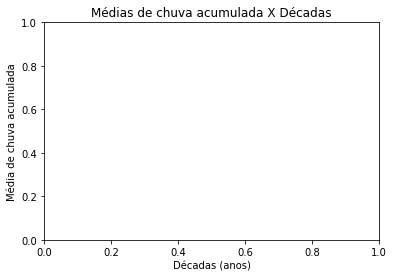

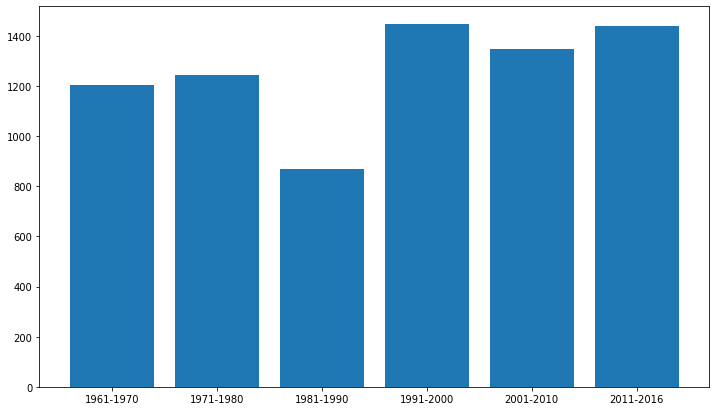

In [13]:
#  d) Além disso, você deve gerar um gráfico de barras com as médias acumuladas por década.
#   Não esqueça de rotular os eixos e usar legendas para deixar o seu gráfico informativo e bem elaborado.

decadas = ['1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2016']   # Colocando valores para o eixo X
chuvas = [media_d1, media_d2, media_d3, media_d4, media_d5, media_d6]                      # Colocando valores para o eixo Y
plt.ylabel('Média de chuva acumulada')                                                     # Adicionando um nome para o eixo Y
plt.xlabel('Décadas (anos)')                                                               # Adicionando um nome para o eixo X
plt.title('Médias de chuva acumulada X Décadas')                                           # Colocando um título no gráfico
plt.figure(figsize=(12,7))                                                                 # Definindo o tamanho da figura
plt.bar(decadas, chuvas)                                                                   # Plotando o gráfico de barra


arquivo.close()